# Introdução<bR>

Resolução do Desafio do Curso da TERA "Projeto Tera : DESAFIO DE INFERÊNCIA"

<br>

O desafio proposto trata sobre o transtorno depressivo, um problema multifatorial que pode ter várias possíveis combinações de situações como causa.

<br>

Os dados disponíveis são resultados da NHNES (National Health and Nutrition Examination Survey), realizada anualmente nos EUA para avaliar a saúde e nutrição de adultos e crianças;

<br>

Perguntas sugeridas:
    
<br>

1- Qual o perfil de individuos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no periodo entre 2005-2006

<br>

2- Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população? 


# Carregando Bibliotecas

In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# Carregando Conjunto de Dados

In [86]:
df_demo=pd.read_csv('DEMO_PHQ.csv')
df_pag=pd.read_csv('PAG_HEI.csv')

df_pag.head()


,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [87]:
df_demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


# Transformações nos Dados

Juntando os dois conjuntos de dados tendo como coluna comum a SEQN "Identificador único do respondente"


In [88]:
df=pd.merge(df_demo,df_pag,on='SEQN',how='left')
print(df.shape)
df.head()

(5334, 31)


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [89]:
def visualizar_faltantes(valor):
    print(f'Quantidade percentual de dados faltantes:')
    return (round(valor.isnull().sum()/valor.shape[0],4)*100).astype(str)+"%"
visualizar_faltantes(df)

Quantidade percentual de dados faltantes:


SEQN                                      0.0%
DPQ010                                   9.34%
DPQ020                                   9.34%
DPQ030                                   9.34%
DPQ040                                   9.34%
DPQ050                                   9.34%
DPQ060                                   9.34%
DPQ070                                   9.34%
DPQ080                                   9.34%
DPQ090                                   9.34%
RIAGENDR                                  0.0%
RIDAGEYR                                  0.0%
RIDRETH1                                  0.0%
DMDEDUC                                   0.0%
INDFMINC                                 0.88%
PAG_MINW                                  0.0%
ADHERENCE                                 0.0%
HEI2015C1_TOTALVEG          5.140000000000001%
HEI2015C2_GREEN_AND_BEAN    5.140000000000001%
HEI2015C3_TOTALFRUIT        5.140000000000001%
HEI2015C4_WHOLEFRUIT        5.140000000000001%
HEI2015C5_WHO

Como existe uma porcentagem baixade valores faltantes, escolhi por remove-los.

In [90]:
df.dropna(inplace=True)
print(df.shape)
visualizar_faltantes(df)

(4702, 31)
Quantidade percentual de dados faltantes:


SEQN                        0.0%
DPQ010                      0.0%
DPQ020                      0.0%
DPQ030                      0.0%
DPQ040                      0.0%
DPQ050                      0.0%
DPQ060                      0.0%
DPQ070                      0.0%
DPQ080                      0.0%
DPQ090                      0.0%
RIAGENDR                    0.0%
RIDAGEYR                    0.0%
RIDRETH1                    0.0%
DMDEDUC                     0.0%
INDFMINC                    0.0%
PAG_MINW                    0.0%
ADHERENCE                   0.0%
HEI2015C1_TOTALVEG          0.0%
HEI2015C2_GREEN_AND_BEAN    0.0%
HEI2015C3_TOTALFRUIT        0.0%
HEI2015C4_WHOLEFRUIT        0.0%
HEI2015C5_WHOLEGRAIN        0.0%
HEI2015C6_TOTALDAIRY        0.0%
HEI2015C7_TOTPROT           0.0%
HEI2015C8_SEAPLANT_PROT     0.0%
HEI2015C9_FATTYACID         0.0%
HEI2015C10_SODIUM           0.0%
HEI2015C11_REFINEDGRAIN     0.0%
HEI2015C12_SFAT             0.0%
HEI2015C13_ADDSUG           0.0%
HEI2015_TO

In [91]:
df.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

O proprio criador do data set sugere a criação de uma nova variavel que é a soma dos questionarios feitos "DPQ010 até DPQ090" e depois uma realização de um diagnostico baseado no valor dessa soma chamado de vrl_phq

<br>

Neste DataFrame os valores "7 = Se recusou a responder" e "9 = Não sabe" devem ser substituidos por NaN, ja que iremos realizar a soma dos questionario afim de fazer os "diagnoticos" 


In [92]:
vrl_phq=df[['DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']]
vrl_phq

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5329,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5330,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0
5331,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
vrl_phq = vrl_phq.replace([7, 9], np.nan)
for coluna in vrl_phq.columns:
    print(f"{coluna}: {vrl_phq[coluna].unique()}")
df['phq_score']=vrl_phq.sum(axis=1)

DPQ010: [ 0.  1.  2.  3. nan]
DPQ020: [ 0.  1.  2.  3. nan]
DPQ030: [ 0.  1.  2. nan  3.]
DPQ040: [ 0.  1.  2. nan  3.]
DPQ050: [ 0.  3.  1.  2. nan]
DPQ060: [ 0.  1.  2.  3. nan]
DPQ070: [ 0.  1.  3.  2. nan]
DPQ080: [ 0.  1. nan  3.  2.]
DPQ090: [ 0.  1.  2.  3. nan]


In [94]:
df.drop(['DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090'],axis=1,inplace=True)
print(df.shape)
df.head()

(4702, 23)


,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq_score
1,31131,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0
2,31132,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0
3,31134,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0
4,31139,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0
5,31143,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,...,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0


In [95]:
df['phq_score'].describe()

count    4702.000000
mean        2.734368
std         3.744193
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        27.000000
Name: phq_score, dtype: float64

In [96]:
def diagnostico(valor):
    if valor<5:
        return 'Sem Sintomas'
    elif 5<=valor<=9:
        return 'Sintomas Leves'
    elif 9<valor<=14:
        return 'Sintomas Moderados'
    elif 14<valor<=19:
        return 'Sintomas Moderadamentes Severes'
    elif valor>19:
        return 'Sintomas Severos'
    
df['phq_agrp']=df['phq_score'].apply(diagnostico)

In [97]:
df['phq_agrp'].value_counts()

Sem Sintomas                       3726
Sintomas Leves                      684
Sintomas Moderados                  196
Sintomas Moderadamentes Severes      72
Sintomas Severos                     24
Name: phq_agrp, dtype: int64

In [98]:
change_names = {
  "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 2: 'Outro',
               3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
  "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio",
              4: "Superior \n incompleto", 5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
    "INDFMINC": {1: np.mean([0,4999]), 2: np.mean([5000,9999]),
               3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]),
               7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]),
               11: 75000, 12: np.mean([20000, 90000]), 13: np.mean([0, 19999]),
               77: np.nan, 99: np.nan}
}

df=df.replace(change_names)

In [99]:
df.dropna(inplace=True)
df.drop('SEQN',axis=1,inplace=True)
df

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq_score,phq_agrp
1,Feminino,44,Negro \n não hispânico,Superior \n incompleto,75000.0,264.711316,Adequado,3.115103,0.000000,5.000000,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas
2,Masculino,70,Branco \n não hispânico,Superior \n completo,75000.0,1353.348730,Acima,3.509081,0.000000,5.000000,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas
3,Masculino,73,Branco \n não hispânico,Ensino \n médio,55000.0,1011.478060,Acima,2.845772,1.283933,2.629005,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas
4,Feminino,18,Outro,Ensino \n médio,75000.0,1729.145497,Acima,5.000000,0.000000,0.991614,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas
5,Masculino,19,Branco \n não hispânico,Superior \n incompleto,75000.0,3768.083141,Acima,2.867000,0.389880,5.000000,...,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,Sintomas Leves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,Feminino,58,5,9-12 ano,12499.5,9.237875,Baixo,2.885575,1.260753,5.000000,...,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,Sem Sintomas
5330,Feminino,66,Americano Mexicano,< 9 ano,49999.5,173.210162,Adequado,5.000000,2.851503,5.000000,...,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,Sintomas Moderados
5331,Masculino,19,Negro \n não hispânico,Superior \n incompleto,7499.5,184.711316,Adequado,2.555935,0.000000,2.613733,...,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,Sem Sintomas
5332,Masculino,34,Branco \n não hispânico,Superior \n incompleto,39999.5,27.713626,Baixo,2.457422,2.930799,2.311917,...,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,Sem Sintomas


In [100]:
var_num=[
    'RIDAGEYR',
    "INDFMINC",
    "PAG_MINW",
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq_score"]

var_cat=[
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_agrp"
]

# ANÁLISE EXPLORATÓRIA (EDA) UNIVARIADA

# Variaveis Numericas


Existem alguns valores de 'PAG_MINW" muitos altos para serem corretos resolvi apaga-los.

In [146]:
errors=list(df[df['PAG_MINW']>3000].index)
df.drop(errors,axis=0,inplace=True)

In [147]:
df[var_num].describe(percentiles=[.01,.25,.5,.75,.99]).round(2)

,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq_score
count,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00,4532.00
mean,45.06,41362.15,409.82,3.21,1.81,2.48,2.37,1.77,3.78,4.44,2.59,4.69,4.74,5.83,6.01,6.21,49.94,2.73
std,19.77,24336.85,526.87,1.46,2.14,1.95,2.17,1.91,1.59,1.00,2.17,3.23,3.41,3.48,3.19,3.34,12.35,3.74
min,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
1%,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,0.00,0.00,0.00,0.00,0.00,24.86,0.00
25%,27.00,17499.50,41.57,2.07,0.00,0.44,0.00,0.00,2.65,4.18,0.00,1.99,1.58,3.00,3.62,3.71,40.95,0.00
50%,43.00,39999.50,214.78,3.22,0.09,2.30,2.09,1.03,4.95,5.00,2.59,4.43,4.81,6.27,6.32,6.88,49.44,1.00
75%,61.00,69999.50,554.27,4.83,4.47,4.90,5.00,3.43,5.00,5.00,5.00,7.26,7.61,9.29,8.93,9.43,58.06,4.00
99%,85.00,75000.00,2407.07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.87,17.00
max,85.00,75000.00,2993.07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


In [161]:
df['PAG_H']=df['PAG_MINW']/60

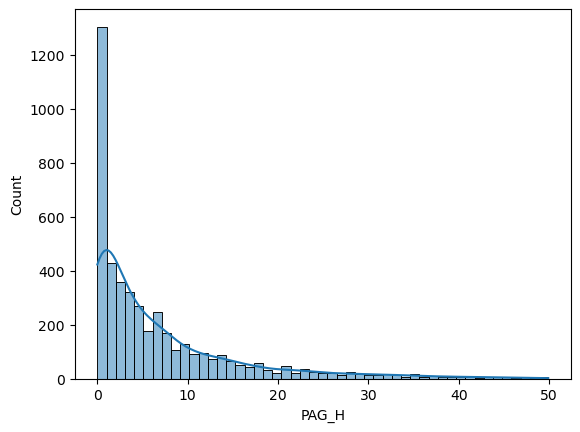

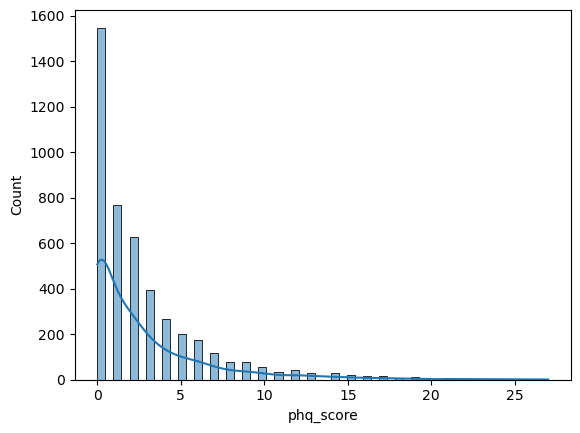

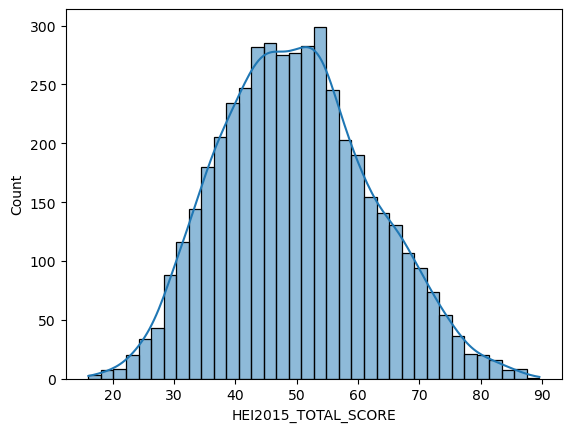

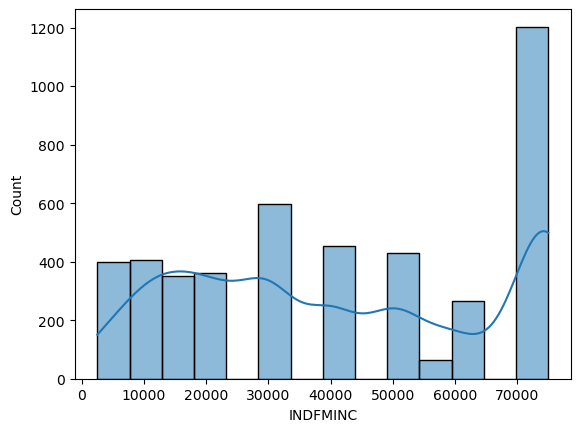

In [165]:
var_num_2=['PAG_H','phq_score',"HEI2015_TOTAL_SCORE",'INDFMINC']
for var in var_num_2:
    sns.histplot(df[var],kde=True)
    plt.show()

# Variaveis Categoricas

In [167]:
df[var_cat]

,RIAGENDR,RIDRETH1,DMDEDUC,ADHERENCE,phq_agrp
1,Feminino,Negro \n não hispânico,Superior \n incompleto,Adequado,Sem Sintomas
2,Masculino,Branco \n não hispânico,Superior \n completo,Acima,Sem Sintomas
3,Masculino,Branco \n não hispânico,Ensino \n médio,Acima,Sem Sintomas
4,Feminino,Outro,Ensino \n médio,Acima,Sem Sintomas
6,Masculino,Outro,Ensino \n médio,Acima,Sem Sintomas
...,...,...,...,...,...
5329,Feminino,5,9-12 ano,Baixo,Sem Sintomas
5330,Feminino,Americano Mexicano,< 9 ano,Adequado,Sintomas Moderados
5331,Masculino,Negro \n não hispânico,Superior \n incompleto,Adequado,Sem Sintomas
5332,Masculino,Branco \n não hispânico,Superior \n incompleto,Baixo,Sem Sintomas


In [190]:
def grafico_frequencia(data1,coluna,variavel):
    
    contagem=data1[coluna].value_counts(normalize=True).reset_index()
    contagem.columns=[variavel,'porcentagem']
    sns.barplot(x=variavel,y='porcentagem',data=contagem)
    plt.ylim(0,1)
    plt.show()
    
    

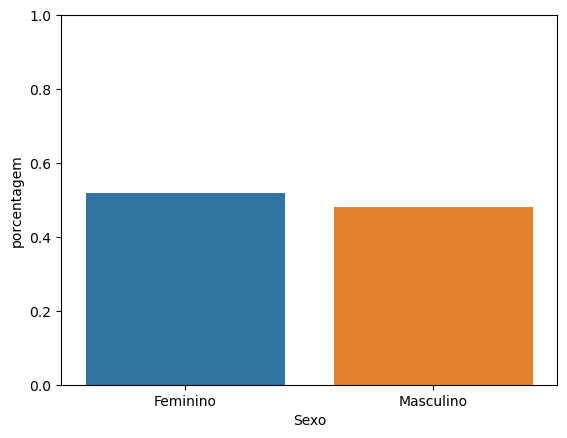

In [191]:
grafico_frequencia(df,'RIAGENDR','Sexo')

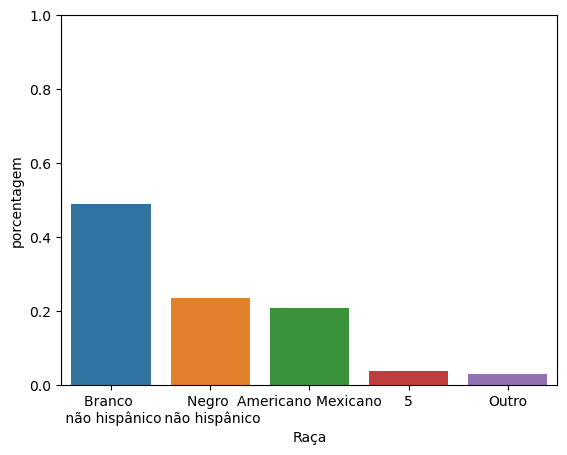

In [192]:
grafico_frequencia(df,'RIDRETH1','Raça')